# Real Estate - advanced estimator

In the the previous challenge, we saw that if we have more flats than feature in our dataset, we can't "solve the equation" $X\theta = Y$ to find a deterministic formula for $\theta$ and thus predict flat price this way.

In this exercice, we now have access to a bigger dataset comprising of 1000 flats, and we want to refine our prediction for the same new flat than before

- `Surface`: 3000 $ft^2$
- `Bedrooms`: 5 
- `Floors`: 1

Instead of solving $X\theta = Y$ with a matrix $X$ of shape (1000,4) non-inversible, we will find the $\hat{\theta}$ that minimizes the error $e = X\hat{\theta} - Y $: This approach is called a **linear regression model**. We will measure this error $e$ using the euclidian distance $\left\|e\right\|$ using the Mean Square Error.

Let's compute $\hat{\theta}$ to find an approximate estimation of the price this new flat


In [ ]:
# import default libraries
# You can now use pandas again to manipulate the data table easily


## 1 Explore data

In [ ]:
# Load the dataset `flats.csv` located in the notebook's folder, into a pandas DataFrame named "flats"


Use scatterplots to visually figure-out which feature gives the most information about prices?

In [ ]:
# Your plots here


It seems that `surface` is a stronger indicator of price than the number of bedrooms or floor. In statistics, we say that `prices` are more **correlated** with `surface` than with other features. 

Let's double check this by running [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) below, which computes correlation coefficients between each pair of columns of a DataFrame. 1 meaning perfectly correlated, 0 not correlated at all.

In [ ]:
# YOUR CODE HERE

## 2 Estimator with 1-feature

Let's try to build a statistical estimator of `price` only as a function of `surface`.

Let's try to fit a **linear regression** between the two variables. Concretely speaking, we want to to choose the best parameters $\hat{\theta}$ = (`slope`, `intercept`) such that the `slope * surface + intercept` is as close as possible from the `price` in terms of Mean Square Error.

👉During the next weeks, we will learn different models (Linear Regression, KNN, Logistic Regression, Neural Networks,…). An important part of your job consists in choosing the right model and optimize the parameters to make the best predictions.

### 2.1 Visual approach

Implement the function `plot_line(slope, intercept, ax)` that plot a line with the slope and intercept arguments on the ax figure. We add the argument ax, so you can plot the line(s) on your scatterplot.
When you are done play with different value for slope and intercept in order to get a “good linear approximation” of the data. Can you find the best fit?

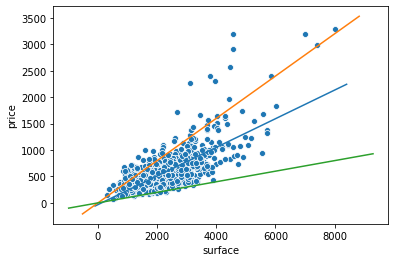

Not so easy (and not very “scientific”), right?

In [ ]:
def plot_line(a, b, ax):
    """Plot a line from slope and intercept on the ax"""
    # INSERT YOUR CODE
    pass

In [ ]:
# TO DO: play with slopes and intercepts to get the best fit


### 2.2 Computational approach

To be sure that our estimator line is the best possible one, we need to compute  the **Mean Squared Error** between `price` and `predicted_price (slope * surface + intercept)`. Remember those are vectors of shape (1000,1).

Step1: for each row (ie. flat), we should evaluate the squared_error (predicted_price - price)**2

In [ ]:
def squared_errors(slope, intercept, surfaces, prices):
    """TO DO: return an array containing the squared errors between 
    all predicted_prices and the actual prices (from the dataset)
    """
    # INSERT YOUR CODE
    pass

Step2: Return the mean of the array contained in squared_errors.

In [ ]:
def mse(slope, intercept, surfaces, prices):
    '''TO DO: Return the mean of the array contained in squared_errors.'''
    # INSERT YOUR CODE
    pass

In [ ]:
# Try to compute the RMSE of one estimator of your choice


### 2.3 Finding the best parameters

Play with different values for `slope` and `intercept` and try to get the best fit by hand!  
Notice how hard is it to co-optimize for 2 parameters at the same time.
Follows the step below to get an idea of one potential approach:

**Step ①**: Start by fixing intercept to your best guess value, and find the minimal value for `mse=f(slope)`

In [ ]:
# For instance, we may suppose there is always a small transaction even for very small flats?
intercept_initial_guess = ? 

# Create a range of 100 slopes which contain what you believe is the optimal slope (hint: np.linspace())

# Create the list of MSEs for each slope value (hint: Use list comprehension of the python the map() function)


In [ ]:
# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!


In [ ]:
# Compute the min value of MSEs for intercept=0, and the corresponding `slope_best` value
# Hint: see you can use python build-in `min()` function, as well as `List.index()` method


**Step ②**: Let's now fix the slope to that `slope_best` value, and find the best intercept for that given slope, re-using previous approach

In [ ]:
# Create a range of 100 slopes which contain what you believe is the optimal slope

# Create the list of MSEs for each intercept value

# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!


In [ ]:
# Compute the min value of MSEs for slope=slope_best and store the corresponding best intercept




**Great job**! By adding a non-zero intercept parameter, we have been able to reduce the MSE even more (Feel free to plot the regression line in your scatter plot to "visually" confirm the approximate fit).

🤔 However, what guarantees you that these (`intercept_best`, `slope_best`) parameters are really the best ones? In theory, we could maybe find an even better slope value by repeating step ①, this time fixing intercept at `intercept_best`! And then repeat step ② with the new slope to adjust the intercept again...

In order to find the global minimum of a 2-parameter function RMSE = f(slope, intercept), we may have to repeat step ① and ② indefinitely until values converge towards absolute minimums - and with no guarantee of success.

🔥 You just discovered one of the fondamental aspects of machine learning: **iterative process for finding mimina**.  

👉 As you can guess, in the Data Scientist World, algorithms have been developped to automatize and optimize such processes. In the next few weeks, you will discover the power of algorithms such as **Gradient Descent**, and python libaries such as `Stastmodels` that does this iterative process for you. 

Run the cell below if you are curious to look for the absolute best slope and intercept for this dataset, computed using gradient descent.

In [ ]:
# Try this out (seaborn). This does does not give you access to the underlying coefficient
sns.regplot(data=flats, x='surface', y='price')

In [ ]:
# Try this out (statsmodel)!
import statsmodels.formula.api as smf
regression = smf.ols(formula= 'price ~ surface', data=flats).fit()
regression.params

Let's get back to our initial question: What is your new prediction for the 5th flat below? How does it compare with your initial prediction only based on 4 flats? 

- `surface`: 3000 $ft^2$
- `bedrooms`: 5 
- `floors`: 1

In [ ]:
# compute predicted price (Remember that the real price is 750,000$)
print('predicted price: ', regression.params['surface']*3000 + regression.params['Intercept'])

It's better than our initial deterministic estimator based on only 4 flats, but obviously we miss is the information provided by the number of bedrooms and floors in this prediction

## 3 Estimator with all features (surface, bedrooms, floors)?

Linear regression with three features works on the same principle than one feature, but instead of determining only (`intercept` and `slope`) parameters to minimizes RMSE, we'll need to find 4 parameters: $\hat{\theta}$ = (`intecept`, `slope_surface`, `slope_bedrooms`, `slope_floors`). 

The same gradient iterative method is applicable, and you will code it yourself by hand the next few weeks.
Meanwhile, feel free to run the cell below to see the final result of this multivariate regression:

In [ ]:
# Find the four regression coefficient by running this cell
import statsmodels.formula.api as smf
regression = smf.ols(formula= 'price ~ surface + bedrooms + floors', data=flats).fit()
regression.params

In [ ]:
# Compute the newly predicted price for the 5th flat? Is this prediction better ?
regression.params['Intercept'] +\
regression.params['surface']*3000 +\
regression.params['bedrooms']*5 +\
regression.params['floors']*1

**💪 Concluding remarks (math)**

We just saw that one of the thing we often do in optimisation problem is to try to find a vector of parameters $\hat{\theta}$ (our slopes + intercepts) that minimizes an error $e = \left\|X\hat{\theta} - Y \right\|$, for a given matrice of features $X$ (our surfaces, floors, bedrooms) and a vector of observation $Y$ (our prices)

This minimum $\hat{\theta}$ is reached where the derivative of $e$, that is $2 X^T(X\hat{\theta}−Y)$ equals zero. In other words, we need to solve the linear system $(X^TX)\hat{\theta}=X^TY$, and the minimum can be computed in a closed-formed mathematical formula simply by inverting the matrix $X^TX$, because $X^TX$ is always invertible even if X is not.

However, inverting matrices is computationally complex - $0(n^2)$ minimum. That is why other method have been developped to converge faster toward the minimum, such as the gradient descent. Read more at [stack overflow](https://stats.stackexchange.com/a/278779) if you are interested!